In [1]:
import os

os.environ["KERAS_BACKEND"] = "theano"
import keras

print(keras.backend.backend())

Using Theano backend.


theano


In [1]:
import keras
print(keras.backend.backend())

Using TensorFlow backend.


tensorflow


In [19]:
import pandas as pd

cols = ['uid', 'activity','timestamp',  'x', 'y', 'z']

data_link = '/content/drive/My Drive/WISDM_ar_v1.1_raw.txt'
df = pd.read_csv(data_link, header=None, names=cols)
df.head()

,uid,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [0]:
from sklearn.preprocessing import StandardScaler
act = df['activity']
std = StandardScaler()
df = std.fit_transform(df.iloc[:,3:6])

In [0]:
df = pd.DataFrame(df,columns=['x','y','z'])

In [0]:
df['activity'] = act

In [23]:
df.shape

(1098204, 4)

In [0]:
df = df.dropna(how = 'any')

In [25]:
df.shape

(1098203, 4)

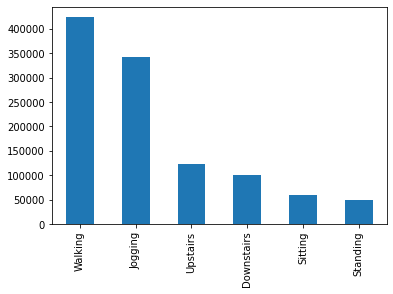

In [26]:
df['activity'].value_counts().plot.bar()

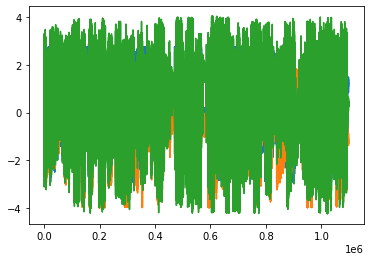

In [27]:
import matplotlib.pyplot as plt

plt.plot(df['x'])
plt.plot(df['y'])
plt.plot(df['z'])

In [28]:
df.head()

,x,y,z,activity
0,-0.198203,0.804142,0.019539,Jogging
1,0.635039,0.594170,0.114083,Jogging
2,0.619130,0.537639,-0.103654,Jogging
3,-0.186271,1.666240,0.549558,Jogging
4,-0.269795,0.719346,1.429102,Jogging


In [29]:
#chunking for making data

from tqdm import tqdm

data = []
target = []
chunk_size = 20
jump_size = 2

for i in tqdm(range(0,len(df) - chunk_size, jump_size)):

  current_x = df['x'].iloc[i:i+chunk_size]
  current_y = df['y'].iloc[i:i+chunk_size]
  current_z = df['z'].iloc[i:i+chunk_size]
  current_label = df['activity'][i : i + chunk_size].value_counts().keys()[0]

  data.append([current_x, current_y, current_z])
  target.append(current_label)


100%|██████████| 549092/549092 [11:46<00:00, 777.60it/s]


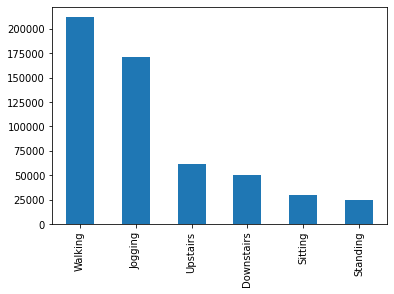

In [30]:
pd.Series(target).value_counts().plot.bar()

In [0]:
import numpy as np
X = np.array(data)
Y = np.array(target)

In [59]:
X.shape,Y.shape

((549092, 3, 20), (549092,))

In [0]:
X = X.reshape(-1, 20, 3)

In [61]:
X.shape, Y.shape

((549092, 20, 3), (549092,))

In [0]:
#mapping target

all_keys = set(list(Y))
map_dic = {}
c = 0
for k in all_keys:
  if k not in map_dic:
    map_dic[k] = c
    c += 1

final_target = []
for f in Y:
  value = map_dic[f]
  final_target.append(value)
Y = final_target

In [63]:
map_dic

{'Downstairs': 2,
 'Jogging': 4,
 'Sitting': 1,
 'Standing': 5,
 'Upstairs': 3,
 'Walking': 0}

In [0]:
Y = np.array(Y)

In [65]:
len(Y)

549092

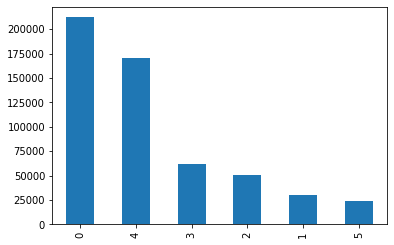

In [66]:
pd.Series(Y).value_counts().plot.bar()

In [0]:
#balancing data
new_X = []
new_Y = []
for idx in range(len(Y)):
  t = Y[idx]
  if t in [2,5,3,1]:

    if t in [5,1]:
      iters_val = 5

    elif t in [3,2]:
      iters_val = 3
    
    for _ in range(iters_val):
      new_X.append(X[idx])
      new_Y.append(Y[idx])

  else:
    new_X.append(X[idx])
    new_Y.append(Y[idx])

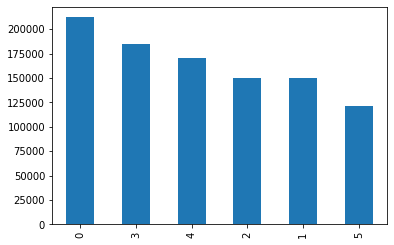

In [68]:
pd.Series(new_Y).value_counts().plot.bar()

In [69]:
for i in range(len(Y)):
  if Y[i] == 3:
    print(X[i])
    break

[[-1.05332131 -0.05104353 -0.71724005]
 [-0.65559203  0.48986827 -0.35928372]
 [-0.29166973 -0.27576057 -0.20218065]
 [ 1.38078194  0.61316433  1.28532687]
 [ 0.74242633  0.23929886  1.0447006 ]
 [ 0.31685605  0.16571892  0.04838879]
 [ 0.08219577 -0.07490729  1.11708175]
 [-0.7242148  -0.34263035 -0.42742681]
 [-0.46174924 -0.13871478 -0.26994751]
 [-0.25783379 -0.31436481 -0.43348374]
 [-0.49607171  0.91114726  0.05510589]
 [ 0.24690766 -0.02969063  0.19037659]
 [ 0.54773355  0.22469901  0.3276663 ]
 [ 0.30949548  0.21149177 -0.51334422]
 [ 0.62977657  0.20289689 -1.28688466]
 [-0.19246821  1.2743935   1.26866357]
 [ 1.34028768 -0.8829246  -0.6737822 ]
 [-0.89151951 -0.74827129 -0.72248662]
 [-0.99752322 -0.78838075 -0.73967638]
 [-0.83708517 -0.8284903  -0.80270563]]


In [0]:
X = np.array(new_X[:])
Y = np.array(new_Y[:])

In [71]:
X.shape

(989048, 20, 3)

In [0]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(X,Y,test_size=0.06)

In [0]:
from keras.utils import to_categorical

ytr = to_categorical(ytr)
yte = to_categorical(yte)

In [80]:
xtr.shape, xte.shape, ytr.shape, yte.shape

((929705, 20, 3), (59343, 20, 3), (929705, 6), (59343, 6))

In [0]:
batch_size = 20
n_features = 3
opt_size = ytr[0].shape[0]

In [0]:
xtr = xtr.reshape(xtr.shape[0], 20, 3, 1)
xte = xte.reshape(xte.shape[0], 20, 3, 1)

In [83]:
xtr.shape, xte.shape, ytr.shape, yte.shape

((929705, 20, 3, 1), (59343, 20, 3, 1), (929705, 6), (59343, 6))

In [0]:
#with CNN
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(16,(2,2), input_shape=xtr[0].shape, activation='relu'))

model.add(Conv2D(32,(2,2),activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(opt_size, activation='softmax'))

In [85]:
print(keras.backend.backend())

tensorflow


In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xtr, ytr, epochs=10, validation_data=(xte, yte))

Epoch 1/10
29054/29054 [==============================] - 81s 3ms/step - loss: 0.3407 - accuracy: 0.8755 - val_loss: 0.2102 - val_accuracy: 0.9271
Epoch 2/10
29054/29054 [==============================] - 81s 3ms/step - loss: 0.2403 - accuracy: 0.9145 - val_loss: 0.1736 - val_accuracy: 0.9404
Epoch 3/10
29054/29054 [==============================] - 79s 3ms/step - loss: 0.2168 - accuracy: 0.9230 - val_loss: 0.1627 - val_accuracy: 0.9442
Epoch 4/10
29054/29054 [==============================] - 78s 3ms/step - loss: 0.2035 - accuracy: 0.9275 - val_loss: 0.1535 - val_accuracy: 0.9456
Epoch 5/10
29054/29054 [==============================] - 78s 3ms/step - loss: 0.1948 - accuracy: 0.9306 - val_loss: 0.1518 - val_accuracy: 0.9487
Epoch 6/10
29054/29054 [==============================] - 80s 3ms/step - loss: 0.1881 - accuracy: 0.9333 - val_loss: 0.1482 - val_accuracy: 0.9489
Epoch 7/10
29054/29054 [==============================] - 78s 3ms/step - loss: 0.1834 - accuracy: 0.9347 - val_loss: 0

In [0]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

lstm_model = Sequential()
lstm_model.add(LSTM(20,input_shape = (batch_size,n_features), activation = 'sigmoid'))
#lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(opt_size, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(xtr, ytr, epochs=5, validation_data=(xte, yte))"""

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 19, 2, 16)         80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 1, 32)         2080      
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 39,478
Trainable params: 39,478
Non-trainable params: 0
__________________________________________________

In [0]:
model.save('/content/drive/My Drive/islmodel/activity_model4_tens_balanced_std.h5')

In [0]:
7eza]LGV 